# Part II - Loan Data from Prosper
## by Fabi Daniel


## Investigation Overview


> The *task* is to accurately determine the ***factors*** that affect the *Loan Outcome status* and to give an answer to the *Question* how *well* are the Prosper Loans Doing? Special Focus was put on some variables based on the assumption that the **Rates**, **Principal** and **Term** are important in any loan Situation.

To clarify, the loan status was categorized
* `Positive Loan Status`: This basically is for Loans that are healthy i.e currently running, loans in their final stages and loans already completed
* `Negative Loan Status`: This is for Loans that are unhealthy i.e Cancelled, Chargedoff and Past Due


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, term, borrower income, and many others. The dataset was later trimmed to 12 columns removing columns that are surplus to our investigation and deleting rows with Null Values.
Special Focus was put on some variables based on the assumption that the **Rates**, **Principal** and **Term** are important in any loan Situation.



In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [21]:
# Filter for relevant columns
loans_df = loans[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'Occupation','EmploymentStatus', 'LoanOriginalAmount','IsBorrowerHomeowner',  'MonthlyLoanPayment', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 'ListingCategory (numeric)']]

loans_df.sample(20)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,LoanOriginalAmount,IsBorrowerHomeowner,MonthlyLoanPayment,StatedMonthlyIncome,ProsperRating (Alpha),ListingCategory (numeric)
108531,36,Completed,0.12360,0.1025,Sales - Commission,Full-time,1200,False,38.86,2691.666667,NaN,1
92918,36,Completed,0.14207,0.1350,Other,Full-time,8000,False,271.48,2080.000000,NaN,1
58575,36,Current,0.11563,0.0879,Analyst,Employed,10000,True,317.02,7916.666667,A,7
51304,36,Current,0.21434,0.1774,Accountant/CPA,Employed,10500,True,378.23,6166.666667,C,1
44322,60,Current,0.18197,0.1585,Other,Employed,20000,False,484.77,6250.000000,B,1
992,36,Completed,0.35797,0.3177,Biologist,Employed,2000,False,86.85,4833.333333,HR,7
84020,36,Defaulted,0.13202,0.1250,Other,Full-time,3000,True,100.36,2600.000000,NaN,0
106617,36,Completed,0.35132,0.3149,Fireman,Employed,4000,True,173.09,4583.333333,E,7
14335,36,Completed,0.13413,0.1129,Accountant/CPA,Employed,5000,False,164.38,11200.000000,A,7
111169,36,Chargedoff,0.16215,0.1550,Other,Retired,5600,False,195.50,3166.666667,NaN,0


In [22]:
# drop nulls 
loans_df = loans_df.dropna(axis=0)

In [23]:
loans_df.shape

(83520, 12)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1
What is the ratio of Positive loan Status?
* Current and Completed that are elements in my assumed **Positive Loan Status** are the most occuring Loan Status.
> More than `50%` of Prosper loans are *currently still running*, whereas loan status *Completed* have second most number of counts, representing `30%` of the whole dataset.






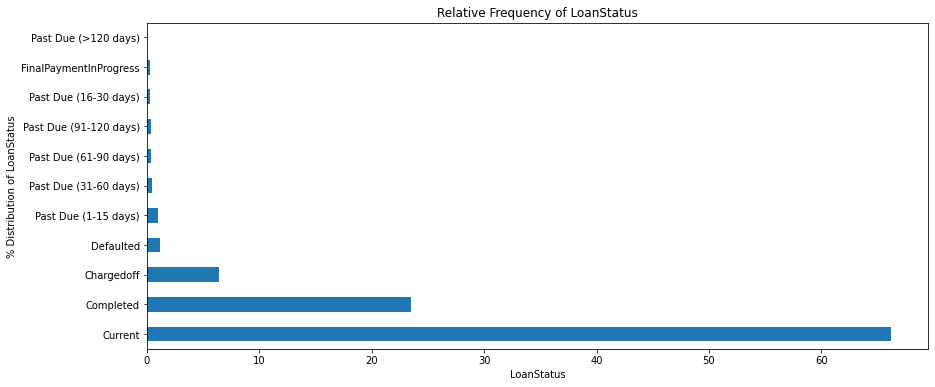

In [24]:

#Explore the LoanStatus

# Define myCountplot function
def myCountplot(xVar,rot=0, color=sb.color_palette()[0],figsize=[14,6],reindex=None,kind='bar'):
    
    if figsize:
        plt.figure(figsize=figsize)

    loans_df[xVar].value_counts(normalize=True).mul(100).reindex(index=reindex).plot(kind=kind, color=color,rot=rot)


    plt.title(f'Relative Frequency of {xVar}')

    if kind =='bar':
        plt.ylabel(f'% Distribution of {xVar}')
        plt.xlabel(xVar)

    else:
        plt.ylabel(f'% Distribution of {xVar}')
        plt.xlabel(xVar)




    
myCountplot('LoanStatus',kind= 'barh')



<div align="center">Fig 1: Relative Frequency of Loan Status </div>


## Visualization 2

Does **loan status** have anything to do **BorrowerRate?**
* Does the **BorrowerRate** have an influence on the completion status of the Loan?
> * Quite Evident, Past Due(>120 days) has the highest minimum rate, while the lowest minimum is in the Completed Status followed by the current status



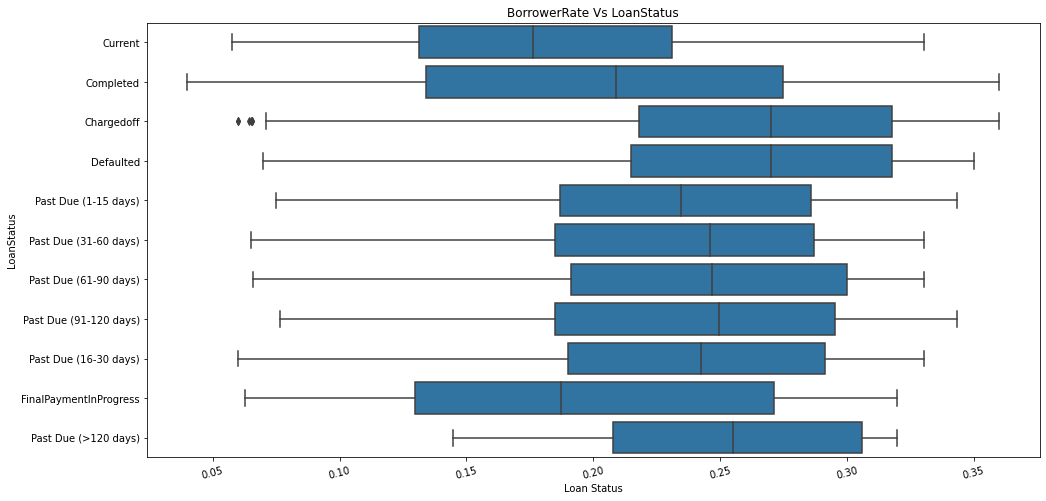

In [25]:

# plot a bivariate plot for the two qualitative variables using boxplot
def ls_rate():

    plt.subplots(figsize=[16,8])

    base_color=sb.color_palette()[0]

    stat_order=loans_df.LoanStatus.value_counts().index


    
    sb.boxplot(data=loans_df,y='LoanStatus',x='BorrowerRate',color=base_color,order=stat_order)
    plt.title('BorrowerRate Vs LoanStatus')
    plt.xlabel('Loan Status')
    plt.xticks(rotation=15)
    plt.show()

ls_rate()


<div align="center">Fig 2: Bivariate Visualization of LoanStatus Vs BorrowerRate </div>


## Visualization 3

What Term and ProsperRating influences Loan Status?
* Across all Loan terms, the Frequency and Order of the Loan Status have always been consistent *(Current & Completed respectively)* with only the exception of 12 months loans, having more completed than current.
* Prosper Rating D is the most completed while ProsperRating C is the most occuring

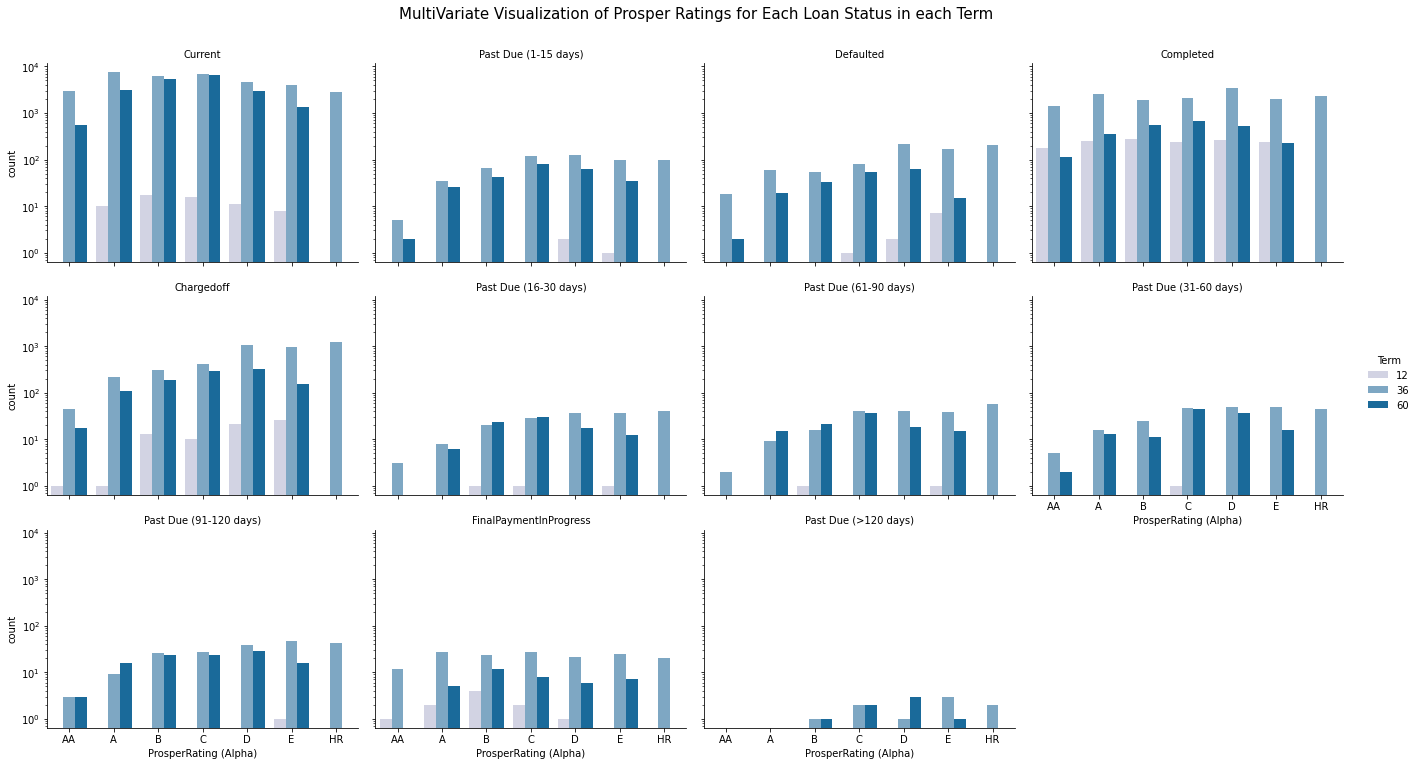

In [26]:

# plot on Grid
def rating_status():
    rating_order=['AA','A', 'B', 'C', 'D','E','HR']
    g = sb.catplot(x='ProsperRating (Alpha)', order= rating_order, hue="Term",hue_order=[12,36,60],  col="LoanStatus",
                data=loans_df, kind="count",
                height=4, palette='PuBu',col_wrap=4,
                dodge=True).set(yscale = 'log');

    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    plt.suptitle("MultiVariate Visualization of Prosper Ratings for Each Loan Status in each Term", fontsize=15, y=1.05);
    g.fig.set_size_inches(20,10)

rating_status()

<div align="center">Fig 2: MultiVariate Visualization of Prosper Ratings for Each Loan Status in each Term </div>


## Key Insights for Presentation

The investigation showed that LoanStatus, Current and Completed that are elements in my assumed **Positive Loan Status** are the most occuring and also have the lowest Rates. BorrowerRate and BorrowerAPR have a positive correlation. 

Across all terms the Frequency and Order of the Loan Status have always been consistent with only the exception of 12 months loans, having more completed than current.

In [27]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 676139 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
